### Importing libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

### Importing data set

In [5]:
df = pd.read_csv("data.csv")

In [6]:
df.head()

,Place Name,Category,PostalCode,Borough,Neighborhood,Latitude,Longitude,HousingPrice
0,Elgin & Winter Garden Theatre Ctr,Music Venue,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,2200
1,Carville Mill Park,Park,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,2200
2,Hina's Beauty Care,Hair Salon,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,2200
3,Richmond Station,American Restaurant,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,2200
4,Cactus Club Cafe,American Restaurant,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,2200


In [7]:
df.shape

(1242, 8)

### Performing label encoding to convert categorical values into numerical values

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
labelencoder = LabelEncoder()

In [10]:
df['Category_num'] = labelencoder.fit_transform(df['Category'])

In [11]:
df['PostalCode_num'] = labelencoder.fit_transform(df['PostalCode'])

In [12]:
df['Borough_num'] = labelencoder.fit_transform(df['Borough'])

In [13]:
df['Neighborhood_num'] = labelencoder.fit_transform(df['Neighborhood'])

In [14]:
df['Place Name_num'] = labelencoder.fit_transform(df['Place Name'])

In [15]:
df.head()

,Place Name,Category,PostalCode,Borough,Neighborhood,Latitude,Longitude,HousingPrice,Category_num,PostalCode_num,Borough_num,Neighborhood_num,Place Name_num
0,Elgin & Winter Garden Theatre Ctr,Music Venue,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,2200,182,54,1,34,346
1,Carville Mill Park,Park,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,2200,194,54,1,34,195
2,Hina's Beauty Care,Hair Salon,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,2200,129,54,1,34,500
3,Richmond Station,American Restaurant,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,2200,3,58,1,67,898
4,Cactus Club Cafe,American Restaurant,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,2200,3,58,1,67,173


In [16]:
X = df[['Place Name_num','Category_num','PostalCode_num','Borough_num','Neighborhood_num','Latitude','Longitude']]
Y = df['HousingPrice']

In [17]:
X.head()
X.shape

(1242, 7)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Standardizing ML model before fitting to avoid creating bias

In [19]:
X = StandardScaler().fit_transform(X)

In [20]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

In [21]:
X_Train.shape

(869, 7)

In [22]:
df['HousingPrice'].nunique()

13

### Explain what the task you’re solving is (e.g., supervised x unsupervised, classification x regression x clustering or similarity matching x, etc)

We are dealing with supervised learning problems here. In supervised learning, models are trained to generate the desired outputs using a training set. The right inputs and outputs are present in this training dataset, allowing the model to improve over time. The algorithm's accuracy is evaluated using the loss function, and iterations are carried out until the error is sufficiently decreased.

The issue is one of classification. Classification predictive modelling is the process of roughly calculating the mapping function from discrete input variables to output variables. The main goal is to identify the class or category to which the new data will belong. k-Nearest Neighbors, Decision Trees, Support Vector Machine, and logistic classification are some of the well-liked algorithms for resolving classification issues.

### Use a feature selection method to select the features to build a model.

In [23]:
from sklearn import svm

In [24]:
svmRregression = svm.LinearSVR().fit(X_Train, Y_Train)

In [25]:
# https://www.kaggle.com/code/pierpaolo28/pima-indians-diabetes-database/notebook

def feature_plot(classifier, feature_names, top_features=2):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(25, 7))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.show()

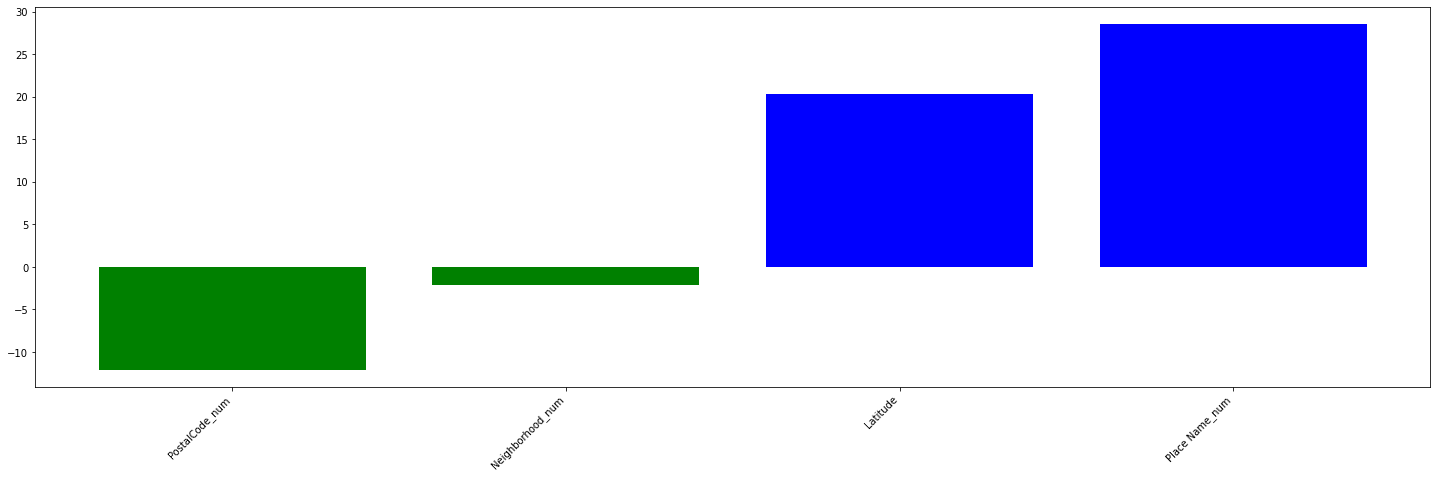

In [26]:
feature_plot(svmRregression,['Place Name_num','Category_num','PostalCode_num','Borough_num','Neighborhood_num','Latitude','Longitude'])

### Select one or more evaluation metrics. Justify your choice.

Confusion metric is being used in this instance as an evaluation metric. It functions as a performance indicator for machine learning classification tasks when the output can include two or more classes. It is a table with combinations of actual and anticipated values.

### Baseline model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute

In [28]:
logisticRegr = LogisticRegression()

In [29]:
logisticRegr.fit(X_Train, Y_Train)

LogisticRegression()

In [30]:
from sklearn import metrics

In [31]:
prediction_test = logisticRegr.predict(X_Test)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
M_LR = confusion_matrix(Y_Test, prediction_test)

In [34]:
logistic_model_accuracy_train = round(logisticRegr.score(X_Train, Y_Train)*100,2)
print('Model accucary on train data:', round(logistic_model_accuracy_train, 2) , '%')

Model accucary on train data: 98.27 %


In [35]:
logistic_model_accuracy_test = round(logisticRegr.score(X_Test, Y_Test)*100,2)
print('Model accucary on train data:', round(logistic_model_accuracy_test, 2) , '%')

Model accucary on train data: 97.59 %


### f. How do you make sure that your model is not overfitting the data?

Cross validation result is approximately same as model. Therefore, the model is not overfitting to the dataset. 

In [36]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
from numpy import mean
from numpy import std

In [39]:
LR_scores = cross_val_score(logisticRegr, X_Train, Y_Train, scoring='accuracy', cv=10,n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(LR_scores), std(LR_scores)))

Accuracy: 0.980 (0.010)


### g. Plot the learning curve. What can you conclude from this plot?

From the learning curves figure, initially, model's accuracy for the train model is around 94%. After that, it becomes stagnant at approximately 98%. Where as test set accuracy starts with 80% and then remained at around 97%.

In [40]:
from mlxtend.plotting import plot_learning_curves

([0.9302325581395349,
  0.930635838150289,
  0.95,
  0.962536023054755,
  0.9654377880184332,
  0.9731285988483686,
  0.9819078947368421,
  0.9841726618705036,
  0.9833759590792839,
  0.9827387802071347],
 [0.8042895442359249,
  0.8739946380697051,
  0.9115281501340483,
  0.9463806970509383,
  0.9490616621983914,
  0.9463806970509383,
  0.967828418230563,
  0.9705093833780161,
  0.9731903485254692,
  0.9758713136729222])

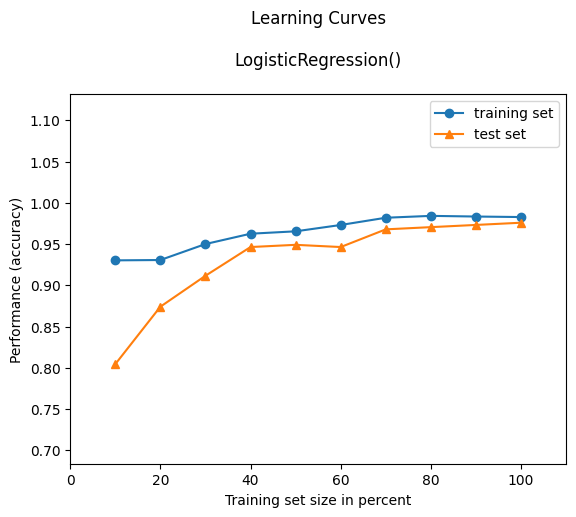

In [41]:
plot_learning_curves(X_Train, Y_Train, X_Test, Y_Test, logisticRegr, scoring='accuracy')

### h. Analyze and discuss model performance.

Logistic regression model gave the accuracy on the test data around 97%. The accuracy nearly the same on validation set, also.

### Multi-layer perceptron classifier to predict house rent.

In [42]:
from sklearn.neural_network import MLPClassifier

In [43]:
from sklearn.model_selection import ShuffleSplit

In [44]:
from sklearn.model_selection import GridSearchCV

### Performing hyperparameter tuning

In [45]:
param_grid = {
    'hidden_layer_sizes': [50, 100],
    'activation': ['identity','logistic','relu'],
    'solver': ['adam'],
    'learning_rate': ['constant','invscaling']
}

In [46]:
gridSearch = GridSearchCV(MLPClassifier(), param_grid, cv = 5, scoring='accuracy', verbose = 2)

In [47]:
gridSearch = gridSearch.fit(X_Train, Y_Train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END activation=identity, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=50, learning

In [48]:
print('Score: ', gridSearch.best_score_)

Score:  0.9838947578234004


In [49]:
print('Pamaters: ', gridSearch.best_params_)

Pamaters:  {'activation': 'identity', 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'solver': 'adam'}


###  Train and evaluate your model on test data.

In [50]:
mlp_model = MLPClassifier(hidden_layer_sizes= 100, activation = 'identity',solver= 'adam', learning_rate='constant')

In [51]:
mlp_model.fit(X_Train, Y_Train)

MLPClassifier(activation='identity', hidden_layer_sizes=100)

In [52]:
y_predict = mlp_model.predict(X_Test)

In [53]:
M = confusion_matrix(Y_Test, y_predict)

In [54]:
mlp_model_accuracy_Train = round(mlp_model.score(X_Train, Y_Train)*100,2)
print('Model accucary on train data:', round(mlp_model_accuracy_Train, 2) , '%')

Model accucary on train data: 98.73 %


In [55]:
mlp_model_accuracy_test = round(mlp_model.score(X_Test, Y_Test)*100,2)
print('Model accucary on test data:', round(mlp_model_accuracy_test, 2) , '%')

Model accucary on test data: 97.59 %


### How do you make sure that your model is not overfitting the data?

Cross validation result is approximately same as trained model. Therefore, the model is not overfitting to the dataset. 

In [56]:
scores = cross_val_score(mlp_model, X_Train, Y_Train, scoring='accuracy', cv=10, n_jobs=-1)

In [57]:
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))
scores

Accuracy: 98.389 (1.559)


array([1.        , 0.95402299, 0.96551724, 1.        , 1.        ,
       0.98850575, 0.98850575, 0.98850575, 0.96551724, 0.98837209])

### Plot the learning curve. What can you conclude from this plot?

Training and Test loss that decreases to a point of stability with a minimal gap between the two final loss values.

([0.9302325581395349,
  0.930635838150289,
  0.9730769230769231,
  0.9798270893371758,
  0.9815668202764977,
  0.9846449136276392,
  0.9851973684210527,
  0.9913669064748202,
  0.9872122762148338,
  0.9884925201380897],
 [0.7908847184986595,
  0.8471849865951743,
  0.9276139410187667,
  0.9517426273458445,
  0.9544235924932976,
  0.9731903485254692,
  0.9571045576407506,
  0.9731903485254692,
  0.9758713136729222,
  0.9758713136729222])

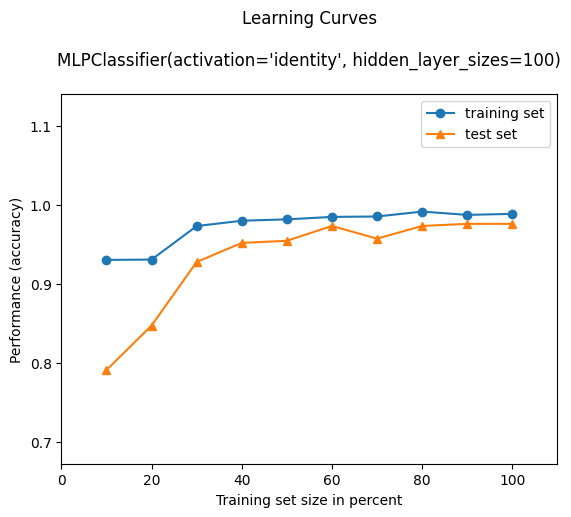

In [58]:
plot_learning_curves(X_Train, Y_Train, X_Test, Y_Test, mlp_model, scoring='accuracy')

### Analyze and discuss model performance.

A multilayer perceptron (MLP) (feedforward artificial neural network) performace well on all datasets (training, validation, and test). It gives 97.59% accuracy for the test data. 

### A box plot to visualize your comparison.

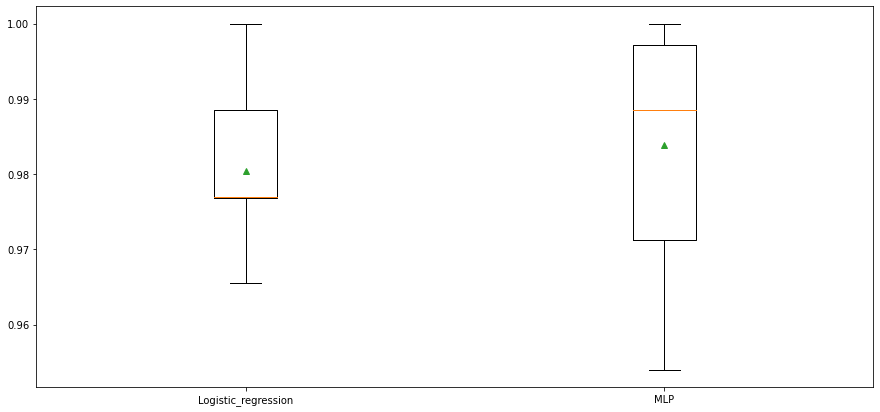

In [59]:
plt.figure(figsize=(15,7))
plt.boxplot([LR_scores, scores], labels=['Logistic_regression', 'MLP'], showmeans=True)
plt.show()

### Compare the model to your baseline model with a statistical significance test.

Significance threshold of 0.05 to reject the null hypothesis that both approaches perform equally well on the dataset when we conduct the 5x2 cv _t test.

In [60]:
from mlxtend.evaluate import paired_ttest_5x2cv

In [61]:
#https://www.srose.biz/wp-content/uploads/2020/08/Comparing-Machine-Learning-Algorithms.html

t, p = paired_ttest_5x2cv(estimator1=logisticRegr, 
                          estimator2=mlp_model, 
                          X= X_Train, 
                          y= Y_Train, 
                          scoring='accuracy', 
                          random_seed=1)

In [62]:
print('P-value: ', p)
print('t-statistics: ', t)

P-value:  0.8100922049350913
t-statistics:  0.2533401773724078


From above results, we cannot reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly same.

### Reference:

[1] https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

[2] https://www.kaggle.com/code/pierpaolo28/pima-indians-diabetes-database/notebook
[3] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
[4] https://towardsdatascience.com/a-deep-dive-into-curve-fitting-for-ml-7aeef64755d2